In [81]:
from sklearn.datasets.samples_generator import make_blobs
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.utils import to_categorical
from matplotlib import pyplot

In [82]:
def create_dataset():
    X, y = make_blobs(n_samples=1000, centers=20, n_features=100, cluster_std=2, random_state=2)
    y = to_categorical(y)
    n_train = 500
    trainX, testX = X[:n_train, :], X[n_train:, :]
    trainy, testy = y[:n_train], y[n_train:]
    return trainX, trainy, testX, testy

In [83]:
def evaluate_model(n_layers, trainX, trainy, testX, testy):
    n_input, n_classes = trainX.shape[1], testy.shape[1]
    
    model = Sequential()
    model.add(Dense(10, input_dim=n_input, activation='relu', kernel_initializer='he_uniform'))
    for _ in range(1, n_layers):
        model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(n_classes, activation='softmax'))
    opt=SGD(lr=0.01, momentum=0.9)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    history = model.fit(trainX, trainy, epochs=100, verbose=0)
    _, test_acc = model.evaluate(testX, testy, verbose=0)
    return history, test_acc
    

layers=1: 0.944
layers=2: 0.994
layers=3: 1.000
layers=4: 0.998
layers=5: 0.182


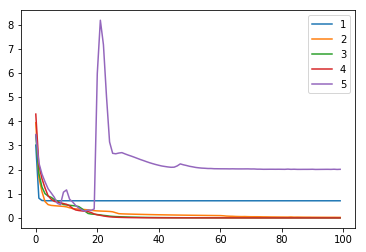

In [84]:
# get dataset
trainX, trainy, testX, testy = create_dataset()
# evaluate model and plot learning curve of model with given number of layers
all_history = list()
num_layers = [1, 2, 3, 4, 5]
for n_layers in num_layers:
	# evaluate model with a given number of layers
	history, result = evaluate_model(n_layers, trainX, trainy, testX, testy)
	print('layers=%d: %.3f' % (n_layers, result))
	# plot learning curve
	pyplot.plot(history.history['loss'], label=str(n_layers))
pyplot.legend()
pyplot.show()

trainX, trainy, testX, testy = create_dataset()
num_layers = [1, 2, 3, 4, 5]
for n_layers in num_layers:
    history, result = evaluate_model(n_layers, trainX, trainy, testX, testy)
    print('layers=%d: %0.3f' % (n_layers, result))
    pyplot.plot(history['loss'], label=str(n_layers))
pyplot.legend()
pyplot.show()